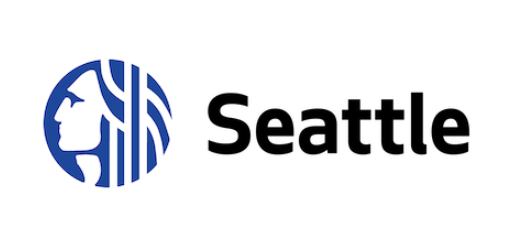

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', 46)

# Contexte
Vous travaillez pour la ville de Seattle. Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, votre équipe s’intéresse de près à la consommation et aux émissions des bâtiments non destinés à l’habitation.
Des relevés minutieux ont été effectués par les agents de la ville en 2016. Voici les données et leur source. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation pour lesquels elles n’ont pas encore été mesurées.


<br>
<br>
<br>
<br>
Le Building Energy Benchmarking and Reporting Program de Seattle (SMC 22.920) exige des propriétaires de bâtiments non résidentiels et multifamiliaux (20 000 pieds carrés ou plus) qu'ils suivent leurs performances énergétiques et présentent un rapport annuel à la ville de Seattle. Les bâtiments sont responsables de 33 % des émissions de base de Seattle. La politique d'analyse comparative soutient les objectifs de Seattle visant à réduire la consommation d'énergie et les émissions de gaz à effet de serre des bâtiments existants. En 2013, la ville de Seattle a adopté un plan d'action climatique visant à atteindre des émissions nettes de gaz à effet de serre (GES) nulles d'ici 2050. L'analyse comparative annuelle, les rapports et la divulgation de la performance des bâtiments sont des éléments fondamentaux pour créer une plus grande valeur marchande pour l'efficacité énergétique.
Conformément à l'ordonnance (125000), à partir de 2015, la ville de Seattle publiera chaque année les données relatives à tous les bâtiments de 20 000 pieds carrés et plus. Cette mise à jour du mandat d'analyse comparative a été adoptée par le conseil municipal de Seattle le 29 février 2016.


# Objectifs
Vous cherchez également à évaluer l’intérêt de l’**ENERGY STAR Score** pour la prédiction d’émissions, qui est fastidieux à calculer avec l’approche utilisée actuellement par votre équipe. Vous l'intégrerez dans la modélisation et jugerez de son intérêt.

Vous sortez tout juste d’une réunion de brief avec votre équipe. Voici un récapitulatif de votre mission :

* Réaliser une courte analyse exploratoire.
* Tester différents modèles de prédiction afin de répondre au mieux à la problématique.


Chargez le fichier `2016_Building_Energy_Benchmarking.csv` à l'aide de Pandas. Stockez le résultat du chargement dans la variable `df`.

In [2]:
df = pd.read_csv('2016_Building_Energy_Benchmarking.csv') 

Head() pour afficher les 5 premières lignes du dataframe `df`.

In [3]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


la taille du dataframe avec shape

In [4]:
df.shape

(3376, 46)

min, max, moyenne, écart type, etc) pour toutes les variables quantitatives avec describes

In [5]:
df.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3.356000e+03,1679.000000,596.000000,2533.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,7.917764e+04,28444.075817,11738.675166,67.918674,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,2.017034e+05,54392.917928,29331.199286,26.873271,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,2.509475e+04,5000.000000,2239.000000,53.000000,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,3.989400e+04,10664.000000,5043.000000,75.000000,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,0.000000,8.427625e+04,7.620025e+04,26640.000000,10138.750000,90.000000,60.400002,64.275002,143.899994,148.349998,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [6]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [7]:
for col in df.columns:
    print(f'{col :-<70} {df[col].nunique()}')

OSEBuildingID--------------------------------------------------------- 3376
DataYear-------------------------------------------------------------- 1
BuildingType---------------------------------------------------------- 8
PrimaryPropertyType--------------------------------------------------- 24
PropertyName---------------------------------------------------------- 3362
Address--------------------------------------------------------------- 3354
City------------------------------------------------------------------ 1
State----------------------------------------------------------------- 1
ZipCode--------------------------------------------------------------- 55
TaxParcelIdentificationNumber----------------------------------------- 3268
CouncilDistrictCode--------------------------------------------------- 7
Neighborhood---------------------------------------------------------- 19
Latitude-------------------------------------------------------------- 2876
Longitude------------------------

In [8]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

# Data Cleaning

## Missing value

,Total,Percent
Comments,3376,1.000000
Outlier,3344,0.990521
YearsENERGYSTARCertified,3257,0.964751
ThirdLargestPropertyUseType,2780,0.823460
ThirdLargestPropertyUseTypeGFA,2780,0.823460
SecondLargestPropertyUseType,1697,0.502666
SecondLargestPropertyUseTypeGFA,1697,0.502666
ENERGYSTARScore,843,0.249704
LargestPropertyUseTypeGFA,20,0.005924
LargestPropertyUseType,20,0.005924


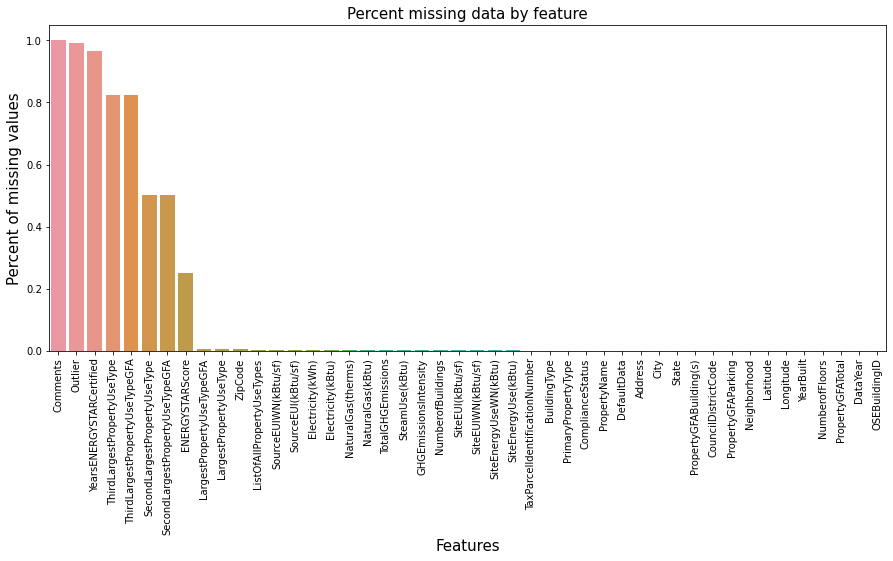

In [9]:
#les total de data pour chaque feature et le pourcentage de missing value
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data

Supression de la feature Comments avec 100% de missiing values

In [10]:
#Supression de la feature "Comments"
df.drop(['Comments'], axis=1,inplace=True)

In [11]:
df.shape

(3376, 45)

## Outliers

In [12]:
df['Outlier'].value_counts()

Low outlier     23
High outlier     9
Name: Outlier, dtype: int64

In [13]:
df[df['Outlier']=='High outlier']

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
226,350,2016,NonResidential,Large Office,Second And Spring Building,1100 Second Avenue,Seattle,WA,98101.0,0942000045,7,DOWNTOWN,47.60642,-122.33581,1958,1.0,6,172842,25920,146922,"Data Center, Office, Parking",Office,99890.0,Data Center,39336.0,Parking,25000.0,NaN,NaN,297.399994,299.200012,909.599976,911.500000,41399504.0,41650404.0,0.0,1.166315e+07,39794668.0,16048.309570,1604831.0,False,Non-Compliant,High outlier,362.66,2.10
517,704,2016,NonResidential,Large Office,401 Elliott Ave West,401 Elliot Ave West,Seattle,WA,98119.0,7666202110,7,MAGNOLIA / QUEEN ANNE,47.62235,-122.36378,2000,1.0,4,129551,42500,87051,"Data Center, Office, Parking",Office,82273.0,Parking,42500.0,Data Center,4778.0,NaN,1.0,311.700012,311.700012,978.900024,978.900024,27137190.0,27137190.0,0.0,7.953454e+06,27137187.0,0.000000,0.0,False,Non-Compliant,High outlier,189.18,1.46
1707,23174,2016,Multifamily LR (1-4),Mid-Rise Multifamily,Taylor Anne Condominium,1730 Taylor Ave N,Seattle,WA,98109.0,8567250000,7,MAGNOLIA / QUEEN ANNE,47.63435,-122.34671,1969,1.0,5,30569,0,30569,Multifamily Housing,Multifamily Housing,30921.0,NaN,NaN,NaN,NaN,NaN,1.0,221.000000,231.899994,684.299988,717.200012,6834431.0,7169577.0,0.0,1.961078e+06,6691197.0,1432.329956,143233.0,False,Non-Compliant,High outlier,54.25,1.77
2763,26852,2016,Multifamily LR (1-4),Low-Rise Multifamily,Atlas Building,420 Maynard Avenue South,Seattle,WA,98104.0,5247802315,2,DOWNTOWN,47.59858,-122.32470,1920,1.0,4,46560,0,46560,"Multifamily Housing, Restaurant, Retail Store",Multifamily Housing,46560.0,Retail Store,3000.0,Restaurant,2000.0,NaN,NaN,133.500000,134.100006,211.300003,213.500000,6881405.5,6916663.0,0.0,5.148407e+05,1756636.0,51247.687500,5124769.0,False,Non-Compliant,High outlier,284.42,6.11
2863,27245,2016,Multifamily LR (1-4),Low-Rise Multifamily,St. Johns Apartments,725 E. Pike Street,Seattle,WA,98122.0,7502500061,3,EAST,47.61390,-122.32241,1910,1.0,3,24682,0,24682,"Multifamily Housing, Retail Store",Multifamily Housing,17822.0,Retail Store,6085.0,NaN,NaN,NaN,74.0,112.199997,113.400002,205.399994,206.699997,2681771.0,2710595.0,0.0,2.937813e+05,1002382.0,16793.890630,1679389.0,False,Non-Compliant,High outlier,96.18,3.90
2922,27526,2016,Multifamily LR (1-4),Low-Rise Multifamily,Vali Hai,800 1st Ave N.,Seattle,WA,98112.0,5457300300,7,MAGNOLIA / QUEEN ANNE,47.62670,-122.35506,1959,2.0,4,43346,0,43346,"Multifamily Housing, Parking, Swimming Pool",Multifamily Housing,43346.0,Parking,12600.0,Swimming Pool,0.0,NaN,5.0,104.300003,111.900002,205.600006,216.100006,4519115.0,4850560.0,0.0,5.843347e+05,1993750.0,25253.650390,2525365.0,False,Non-Compliant,High outlier,148.02,3.41
3082,28735,2016,Multifamily LR (1-4),Low-Rise Multifamily,Building 4,400 NE Thornton Place,Seattle,WA,98125.0,8632880000,5,NORTH,47.70188,-122.32459,2008,1.0,4,46725,0,46725,Multifamily Housing,Multifamily Housing,102522.0,NaN,NaN,NaN,NaN,NaN,1.0,131.300003,140.100006,218.600006,230.899994,13459221.0,14360223.0,0.0,1.161543e+06,3963184.0,94960.359380,9496036.0,False,Non-Compliant,High outlier,531.96,11.38
3092,29390,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Commodore Duchess Apartments,4005 15th Ave NE,Seattle,WA,98105.0,1142002395,4,NORTHEAST,47

In [14]:
df[df['Outlier']=='Low outlier']

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
384,539,2016,NonResidential,Retail Store,University Center,4501 Roosevelt Way NE,Seattle,WA,98105.0,5335200380,4,NORTHEAST,47.66178,-122.31812,1987,1.0,2,69492,0,69492,Retail Store,Retail Store,69800.0,Other,0.0,NaN,NaN,NaN,100.0,4.600000,4.600000,14.300000,14.300000,3.189628e+05,3.189628e+05,0.0,93482.601560,318963.0,0.000000,0.0,False,Non-Compliant,Low outlier,2.22,0.03
448,608,2016,NonResidential,Large Office,411 1ST AVE S (ID608),411 1ST AVE S,Seattle,WA,98104.0,5247800200,2,DOWNTOWN,47.59878,-122.33458,1913,5.0,7,154159,0,154159,Office,Office,193154.0,NaN,NaN,NaN,NaN,NaN,100.0,58.000000,58.799999,28.000000,28.700001,1.119592e+07,1.134876e+07,0.0,471503.000000,1608768.0,3430.500488,343050.0,False,Non-Compliant,Low outlier,29.43,0.19
720,19708,2016,Multifamily HR (10+),High-Rise Multifamily,Bay Vista,2821 2nd Ave,Seattle,WA,98121.0,0586400000,7,DOWNTOWN,47.61706,-122.35141,1982,1.0,24,167941,0,167941,"Multifamily Housing, Swimming Pool",Multifamily Housing,138787.0,Parking,99952.0,Swimming Pool,0.0,NaN,100.0,17.299999,18.700001,50.400002,54.000000,2.407904e+06,2.589126e+06,0.0,626561.625000,2137828.0,2700.760010,270076.0,False,Non-Compliant,Low outlier,29.25,0.17
834,19934,2016,Multifamily LR (1-4),Low-Rise Multifamily,Belmont Lofts,231 Belmont Ave E,Seattle,WA,98102.0,0704600000,3,EAST,47.62059,-122.32440,1989,1.0,4,31702,0,31702,"Multifamily Housing, Parking",Multifamily Housing,26418.0,Parking,14280.0,NaN,NaN,NaN,NaN,9.700000,10.400000,30.400000,32.700001,2.559712e+05,2.754120e+05,0.0,75020.898440,255971.0,0.000000,0.0,False,Non-Compliant,Low outlier,1.78,0.06
839,19967,2016,SPS-District K-12,K-12 School,Queen Anne Gym,1431 2nd Ave N,Seattle,WA,98109.0,0811000005,7,MAGNOLIA / QUEEN ANNE,47.63203,-122.35337,2001,1.0,1,35805,0,35805,K-12 School,K-12 School,35805.0,NaN,NaN,NaN,NaN,NaN,100.0,12.100000,12.100000,27.000000,27.000000,4.314717e+05,4.314717e+05,0.0,72282.398440,246628.0,1848.439575,184844.0,True,Error - Correct Default Data,Low outlier,11.54,0.32
962,20367,2016,Multifamily LR (1-4),Low-Rise Multifamily,City Lights on Harbor,2349 Harbor Ave. SW,Seattle,WA,98126.0,1595200000,1,SOUTHWEST,47.58143,-122.37510,1990,1.0,3,70207,0,70207,Multifamily Housing,Multifamily Housing,71273.0,NaN,NaN,NaN,NaN,NaN,100.0,9.900000,9.900000,30.900000,30.900000,7.024814e+05,7.024814e+05,0.0,205885.500000,702481.0,0.000000,0.0,False,Non-Compliant,Low outlier,4.90,0.07
1045,20617,2016,NonResidential,Retail Store,Seattle Habitat Store,21 S Nevada St,Seattle,WA,98134.0,1824049074,2,GREATER DUWAMISH,47.56535,-122.34054,1953,1.0,1,39900,0,39900,"Non-Refrigerated Warehouse, Retail Store",Retail Store,25000.0,Non-Refrigerated Warehouse,15000.0,NaN,NaN,NaN,100.0,3.600000,3.600000,6.400000,6.400000,1.454688e+05,1.454688e+05,0.0,14362.500000,49005.0,964.640015,96464.0,True,Error - Correct Default Data,Low outlier,5.46,0.14
1229,21315,2016,NonResidential,Small- and Mid-Sized Office,1518 Fifith Ave,1520 Fifth Ave,Seattle,WA,98101.0,1975700135,7,DOWNTOWN,47.61119,-122.33581,1903,1.0,3,57720,0,57720,Office,Office,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,3.000000,3.000000,2.410550e+04,2.410550e+04,0.0,7064.899902,24105.0,0.000000,0.0,False,Non-Compliant,Low ou

Nous ne retenons pas cette feature, nous ferons notre propre analyse des outliers

In [15]:
df.drop(['Outlier'], axis=1,inplace=True)

## ComplianceStatus 
état de conformité 

In [16]:
df.ComplianceStatus.value_counts()

Compliant                       3211
Error - Correct Default Data     113
Non-Compliant                     37
Missing Data                      15
Name: ComplianceStatus, dtype: int64

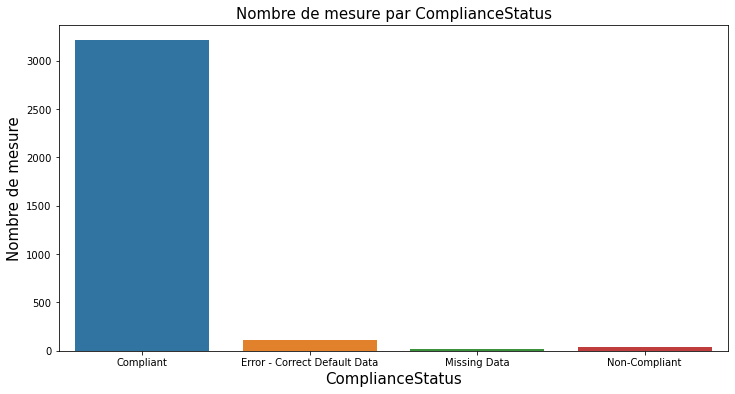

In [17]:
fig = plt.figure(figsize=(12, 6))
sns.countplot(x=df["ComplianceStatus"].sort_values(ascending=True))
plt.xlabel('ComplianceStatus', fontsize=15)
plt.ylabel('Nombre de mesure', fontsize=15)
plt.title('Nombre de mesure par ComplianceStatus', fontsize=15)
plt.show()

In [18]:
df[df['ComplianceStatus']=='Non-Compliant']

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
226,350,2016,NonResidential,Large Office,Second And Spring Building,1100 Second Avenue,Seattle,WA,98101.0,0942000045,7,DOWNTOWN,47.60642,-122.33581,1958,1.0,6,172842,25920,146922,"Data Center, Office, Parking",Office,99890.0,Data Center,39336.0,Parking,25000.0,NaN,NaN,297.399994,299.200012,909.599976,911.500000,4.139950e+07,4.165040e+07,0.0,1.166315e+07,39794668.0,16048.309570,1604831.0,False,Non-Compliant,362.66,2.10
304,435,2016,NonResidential,Other,Washington State Convention Center,705 Pike St,Seattle,WA,98101.0,1978200105,7,DOWNTOWN,47.61195,-122.33167,1990,1.0,6,1400000,0,1400000,"Convention Center, Parking",Convention Center,1072000.0,Parking,686750.0,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000,0.0,False,Non-Compliant,0.00,0.00
384,539,2016,NonResidential,Retail Store,University Center,4501 Roosevelt Way NE,Seattle,WA,98105.0,5335200380,4,NORTHEAST,47.66178,-122.31812,1987,1.0,2,69492,0,69492,Retail Store,Retail Store,69800.0,Other,0.0,NaN,NaN,NaN,100.0,4.600000,4.600000,14.300000,14.300000,3.189628e+05,3.189628e+05,0.0,9.348260e+04,318963.0,0.000000,0.0,False,Non-Compliant,2.22,0.03
448,608,2016,NonResidential,Large Office,411 1ST AVE S (ID608),411 1ST AVE S,Seattle,WA,98104.0,5247800200,2,DOWNTOWN,47.59878,-122.33458,1913,5.0,7,154159,0,154159,Office,Office,193154.0,NaN,NaN,NaN,NaN,NaN,100.0,58.000000,58.799999,28.000000,28.700001,1.119592e+07,1.134876e+07,0.0,4.715030e+05,1608768.0,3430.500488,343050.0,False,Non-Compliant,29.43,0.19
517,704,2016,NonResidential,Large Office,401 Elliott Ave West,401 Elliot Ave West,Seattle,WA,98119.0,7666202110,7,MAGNOLIA / QUEEN ANNE,47.62235,-122.36378,2000,1.0,4,129551,42500,87051,"Data Center, Office, Parking",Office,82273.0,Parking,42500.0,Data Center,4778.0,NaN,1.0,311.700012,311.700012,978.900024,978.900024,2.713719e+07,2.713719e+07,0.0,7.953454e+06,27137187.0,0.000000,0.0,False,Non-Compliant,189.18,1.46
578,773,2016,NonResidential,Small- and Mid-Sized Office,SEATTLE BUILDING,215 COLUMBIA ST,Seattle,WA,98104.0,0939000245,7,DOWNTOWN,47.60380,-122.33293,1924,NaN,4,63150,0,63150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Non-Compliant,NaN,NaN
720,19708,2016,Multifamily HR (10+),High-Rise Multifamily,Bay Vista,2821 2nd Ave,Seattle,WA,98121.0,0586400000,7,DOWNTOWN,47.61706,-122.35141,1982,1.0,24,167941,0,167941,"Multifamily Housing, Swimming Pool",Multifamily Housing,138787.0,Parking,99952.0,Swimming Pool,0.0,NaN,100.0,17.299999,18.700001,50.400002,54.000000,2.407904e+06,2.589126e+06,0.0,6.265616e+05,2137828.0,2700.760010,270076.0,False,Non-Compliant,29.25,0.17
758,19798,2016,Multifamily LR (1-4),Low-Rise Multifamily,SANDHURST APTS,7239 SAND POINT WAY NE,Seattle,WA,98115.0,0225049032,4,NORTHEAST,47.68149,-122.26471,1977,NaN,3,33166,0,33166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Non-Compliant,NaN,NaN
834,19934,2016,Multifamily LR (1-4),Low-Rise Multifamily,Belmont Lofts,231 Belmont Ave E,Seattle,WA,98102.0,0704600000,3,EAST,47.62059,-122.32440,1989,1.0,4,31702,0,31702,"Multifamily Housing, Parking",Multifamily Housing,26418.0,Parking,14280.0,NaN,NaN,NaN,NaN,9.7000

In [19]:
df[df['ComplianceStatus']=='Missing Data']

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
28,34,2016,SPS-District K-12,K-12 School,Meany Building,301/300 21st Ave. E.,Seattle,WA,98112.0,0688000090,3,Central,47.62266,-122.30547,1955,1.0,1,126351,0,126351,K-12 School,K-12 School,126351.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,False,Missing Data,0.00,0.00
31,37,2016,SPS-District K-12,K-12 School,John Hay Elementary,201 Garfield St.,Seattle,WA,98109.0,0809000005,7,MAGNOLIA / QUEEN ANNE,47.63290,-122.35172,1989,1.0,2,51582,0,51582,K-12 School,K-12 School,55166.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,438691.6875,1496816.0,0.000000,0.0,False,Missing Data,10.43,0.20
62,87,2016,SPS-District K-12,K-12 School,Arbor Heights Elementary,3701 S.W. 104th St.,Seattle,WA,98146.0,2518400005,1,SOUTHWEST,47.50970,-122.37759,1948,1.0,2,53352,0,53352,K-12 School,K-12 School,65568.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176088.0938,600813.0,0.000000,0.0,False,Missing Data,4.19,0.08
81,118,2016,SPS-District K-12,K-12 School,Pathfinder K-8,1901 SW Genesee St.,Seattle,WA,98106.0,1324039116,1,DELRIDGE,47.56360,-122.35800,1999,1.0,3,74468,0,74468,K-12 School,K-12 School,75364.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,497706.8125,1698176.0,0.000000,0.0,False,Missing Data,11.84,0.16
85,122,2016,SPS-District K-12,K-12 School,John Muir Elementary,3301 S. Horton St.,Seattle,WA,98144.0,1524049002,2,SOUTHEAST,47.57324,-122.29058,1991,1.0,2,58933,0,58933,K-12 School,K-12 School,60725.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,687906.8750,2347138.0,0.000000,0.0,False,Missing Data,16.36,0.28
95,140,2016,SPS-District K-12,K-12 School,B.F. Day Elementary,3921 Linden Ave. N.,Seattle,WA,98103.0,1931301145,6,LAKE UNION,47.65464,-122.34912,1991,1.0,3,66588,0,66588,K-12 School,K-12 School,66588.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,616730.8125,2104286.0,0.000000,0.0,False,Missing Data,14.67,0.22
133,217,2016,SPS-District K-12,K-12 School,Whitman Middle,9201 15th Ave. NW.,Seattle,WA,98117.0,3526039131,6,BALLARD,47.69675,-122.37760,1959,1.0,1,160270,0,160270,K-12 School,K-12 School,160270.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,43189.171880,4318917.0,False,Missing Data,229.38,1.43
139,227,2016,SPS-District K-12,K-12 School,Washington Middle,2101 S. Jackson,Seattle,WA,98144.0,3646100540,3,CENTRAL,47.59796,-122.30415,1963,1.0,3,136188,0,136188,K-12 School,K-12 School,136188.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,32178.773440,3217877.0,False,Missing Data,170.90,1.25
152,242,2016,SPS-District K-12,K-12 School,Olympic View Elementary,504 N.E. 95th St.,Seattle,WA,98115.0,5100404840,5,NORTH,47.69823,-122.32126,1989,1.0,2,52792,0,52792,K-12 School,K-12 School,55480.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,False,Missing Data,0.00,0.00
614,820,2016,SPS-District K-12,K-12 School,Bailey Gatzert Elementary,1301 E. Yesler Way,Seattle,WA,98122.0,0007600137,3,CENTRAL,47.60120,-122.31548,1988,1.0,1,52924,0,52924,K-12 School,K-12 School,52924.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,573642.5000,1957268.0,0.000000,0.0,False,Missing Data,13.64,0.26


In [20]:
df[df['ComplianceStatus']=='Error - Correct Default Data']

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
22,28,2016,SPS-District K-12,K-12 School,Graham Hill Elementary,5149 S. Graham St.,Seattle,WA,98118.0,1102000138,2,SOUTHEAST,47.545760,-122.268530,1961,1.0,2,56228,0,56228,K-12 School,K-12 School,58916.0,NaN,NaN,NaN,NaN,NaN,95.0,26.100000,29.100000,60.700001,64.599998,1.539478e+06,1.713624e+06,0.0,2.746059e+05,9.369550e+05,6025.229004,6.025230e+05,True,Error - Correct Default Data,38.53,0.69
30,36,2016,SPS-District K-12,K-12 School,Jane Addams Middle,11051 34th Ave. N.E.,Seattle,WA,98125.0,0752000170,5,NORTH,47.709940,-122.293010,1949,1.0,2,160645,0,160645,K-12 School,K-12 School,164229.0,NaN,NaN,NaN,NaN,NaN,75.0,41.299999,47.500000,68.099998,75.699997,6.779173e+06,7.800350e+06,0.0,5.708092e+05,1.947601e+06,48315.718750,4.831572e+06,True,Error - Correct Default Data,270.18,1.68
38,51,2016,SPS-District K-12,K-12 School,Eckstein Middle,3003 N.E. 75th St.,Seattle,WA,98115.0,0425049022,4,NORTHEAST,47.682520,-122.294980,1950,1.0,2,175565,0,175565,K-12 School,K-12 School,182861.0,NaN,NaN,NaN,NaN,NaN,88.0,35.000000,40.099998,55.000000,60.400002,6.399128e+06,7.329818e+06,0.0,4.688405e+05,1.599684e+06,47994.433590,4.799443e+06,True,Error - Correct Default Data,266.05,1.52
86,125,2016,SPS-District K-12,K-12 School,Mercer International Middle,1600 Columbian Way S.,Seattle,WA,98108.0,1624049214,2,GREATER DUWAMISH,47.564130,-122.312080,1957,1.0,1,130862,0,130862,K-12 School,K-12 School,134446.0,NaN,NaN,NaN,NaN,NaN,61.0,48.000000,54.299999,85.599998,93.500000,6.456026e+06,7.300978e+06,0.0,6.631945e+05,2.262820e+06,41932.066410,4.193207e+06,True,Error - Correct Default Data,238.48,1.82
87,127,2016,SPS-District K-12,K-12 School,Orca K-8 School,5215 46th Ave. S.,Seattle,WA,98118.0,1704900242,2,SOUTHEAST,47.554780,-122.275960,1989,1.0,3,59955,0,59955,K-12 School,K-12 School,59955.0,NaN,NaN,NaN,NaN,NaN,93.0,27.200001,29.200001,78.699997,83.000000,1.633399e+06,1.749171e+06,0.0,4.209894e+05,1.436416e+06,1969.832520,1.969830e+05,True,Error - Correct Default Data,20.48,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084,29069,2016,Multifamily LR (1-4),Senior Care Community,Lakeshore,11448 Rainier Ave S,Seattle,WA,98178.0,1180001715,3,EAST,47.500619,-122.220966,1995,1.0,3,124930,0,124930,Senior Care Community,Senior Care Community,132284.0,Senior Care Community,132284.0,NaN,NaN,NaN,98.0,50.799999,52.799999,121.599998,126.300003,6.723972e+06,6.987057e+06,0.0,1.265544e+06,4.318036e+06,24059.349610,2.405935e+06,True,Error - Correct Default Data,157.88,1.26
3126,39332,2016,SPS-District K-12,K-12 School,South Shore K-8,4800 S. Henderson,Seattle,WA,98118.0,2123700250,2,SOUTHEAST,47.523740,-122.272010,2009,1.0,2,138705,0,138705,K-12 School,K-12 School,138705.0,NaN,NaN,NaN,NaN,NaN,84.0,35.799999,38.500000,82.800003,85.699997,4.959298e+06,5.344758e+06,0.0,8.805380e+05,3.004396e+06,19549.021480,1.954902e+06,True,Error - Correct Default Data,124.77,0.90
3366,50210,2016,Nonresidential COS,Office,Central West HQ / Brown Bear,1403 w howe,Seattle,WA,NaN,2425039137,7,MAGNOLIA / QUEEN ANNE,47.635720,-122.375250,1952,1.0,1,13661,0,13661,Office,Office,13661.0

Comme pour les Outliers, notre analyse permettra de selectionner ou non les données pertinantes et conforme pour obtenir in fine des models de prediction efficace

In [21]:
df.drop(['ComplianceStatus'],axis=1, inplace=True)

## DefaultData

In [22]:
df.DefaultData.value_counts()

False    3263
True      113
Name: DefaultData, dtype: int64

Comme pour les Outliers et ComplianceStatus, notre analyse permettra de selectionner ou non les données pertinantes et conforme pour obtenir in fine des models de prediction efficace

In [23]:
df.drop(['DefaultData'],axis=1, inplace=True)

In [24]:
df_residence = df.copy()

 ## Bâtiment résidentiel/ non résidentiel
 
 Un bâtiment doit être considéré comme un bâtiment résidentiel lorsque plus de la moitié de la surface de plancher est utilisée à des fins d'habitation. Les autres bâtiments doivent être considérés comme non résidentiels.

Deux types de bâtiments résidentiels peuvent être distingués :

- maisons (bâtiments d'habitation en plain-pied) : comprenant tous les types de maisons (maisons individuelles, mitoyennes, mitoyennes, maisons en enfilade, etc.) dont chaque logement a sa propre entrée directement depuis le sol ;

- autres immeubles d'habitation : comprenant tous les immeubles d'habitation autres que les immeubles d'habitation en plain-pied tels que définis ci-dessus.

Un bâtiment est considéré comme un bâtiment non résidentiel lorsque la partie mineure du bâtiment (c'est-à-dire moins de la moitié de sa surface de plancher brute) est utilisée à des fins d'habitation.

Les bâtiments non résidentiels comprennent :

- bâtiments industriels ;
- les bâtiments commerciaux ;
- les bâtiments scolaires ;
- les bâtiments de santé ;
- d'autres bâtiments.

L'objectif ici est d'identifier les possibles erreurs d'étiquette pour le property type, nous croisons les données de building type et primary property type

In [25]:
# pd.cross tab
pd.crosstab(df['PrimaryPropertyType'],
            df['BuildingType'])

BuildingType,Campus,Multifamily HR (10+),Multifamily LR (1-4),Multifamily MR (5-9),NonResidential,Nonresidential COS,Nonresidential WA,SPS-District K-12
PrimaryPropertyType,,,,,,,,
Distribution Center,0,0,0,0,51,2,0,0
High-Rise Multifamily,0,105,0,0,0,0,0,0
Hospital,0,0,0,0,10,0,0,0
Hotel,0,1,0,0,76,0,0,0
K-12 School,4,0,0,0,39,0,0,96
Laboratory,0,0,0,0,10,0,0,0
Large Office,1,0,0,0,168,4,0,0
Low-Rise Multifamily,1,0,984,0,2,0,0,0
Medical Office,0,0,0,0,38,1,0,0


In [26]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

### Multifamily HR (10+)

In [27]:
df.loc[(df['BuildingType'] == 'Multifamily HR (10+)') & (
            df['PrimaryPropertyType'] != 'High-Rise Multifamily'), ['PrimaryPropertyType','PropertyName','Address']]

,PrimaryPropertyType,PropertyName,Address
876,Other,The Olivian,809 Olive Way
1153,Senior Care Community,Horizon House,900 University Street
2673,Senior Care Community,The Hearthstone,6720 E. Greenlake Way N.
2814,Senior Care Community,Bayview Manor,11 W. Aloha St.
2823,Hotel,Four Seasons Hotel,99 Union Street


In [28]:
df.loc[2823,'BuildingType'] = 'NonResidential'

Nous savons juste que l'hotel Four Season n'est un pas considéré comme un bâtiment résidentiel. Les hôtels sont des établissements commerciaux

In [29]:
df.loc[(df['BuildingType'] != 'Multifamily HR (10+)') & (
            df['PrimaryPropertyType'] == 'High-Rise Multifamily'), ['BuildingType','PropertyName','Address']]

,BuildingType,PropertyName,Address


In [30]:
df.drop(df[df['PrimaryPropertyType'] == 'High-Rise Multifamily'].index, inplace = True)

### Multifamily LR (1-4)
* Si nous retrouvons des Senior care service, ils sont considérées comme des bâtiments résidentiels. Elles sont conçues pour offrir un logement et des soins de qualité aux personnes âgées. Nous n'apporterons pas de modification
* Other peut également décrire des bâtiments résidentiels, type des batiments de communauté

In [31]:
df.loc[(df['BuildingType'] == 'Multifamily LR (1-4)') & (
    df['PrimaryPropertyType'] != 'Low-Rise Multifamily'), ['PrimaryPropertyType', 'PropertyName', 'Address']]

,PrimaryPropertyType,PropertyName,Address
646,Senior Care Community,Paramount Rehab & Nursing,2611 S Dearborn St.
662,Mixed Use Property,Yesler Place,1404 E Yesler Way
666,Mixed Use Property,The Admiral West Seattle-415,2331 42nd Ave SW
760,Other,APEX BELLTOWN COOP,2225 First Ave
1032,Mixed Use Property,Sweetbrier Apartments,8 West Crockett
1034,Mixed Use Property,Eden Hill (McKinstry),11 West Crockett
1076,Small- and Mid-Sized Office,Queenview Apartments,621 W Galer St
1114,Mixed Use Property,Cosmopolitan Apartments,400 NE 45th St # 120
1173,Mixed Use Property,41 Dravus St,41 Dravus St
1345,Senior Care Community,24747-Brookdale Northgate,11501 15th Ave NE


In [32]:
#index 1707 Small- and Mid-Sized Office mal catégorisé
df.loc[1707,'BuildingType'] = 'Multifamily MR (5-9)'

In [33]:
df.loc[(df['BuildingType'] != 'Multifamily LR (1-4)') & (
    df['PrimaryPropertyType'] == 'Low-Rise Multifamily'), ['BuildingType', 'PropertyName', 'Address']]

,BuildingType,PropertyName,Address
644,NonResidential,Pacific Pointe,2108 N Pacific St.
1300,Campus,Sanitary Market,1525 FIrst Avenue
2450,NonResidential,(ID25674) COMET TAVERN,916 E PIKE ST


* Pacific Pointe >> il s'agit de location d' Apartments in Seattle, WA
* Sanitary Market >> En 1974 a été adapté à un usage résidentiel
* COMET TAVERN >> il s'agit d'un Bar in Capitol Hill

In [34]:
df.loc[2450,'PrimaryPropertyType'] = 'Restaurant'

Nous changeons le **Building type** pour **Multifamily LR (1-4)**

In [35]:
df.loc[644,'BuildingType'] = 'Multifamily LR (1-4)'
df.loc[1300,'BuildingType'] = 'Multifamily LR (1-4)'

In [36]:
df.drop(df[df['PrimaryPropertyType'] == 'Low-Rise Multifamily'].index, inplace = True)

### Multifamily MR (5-9)

In [37]:
df.loc[(df['BuildingType'] == 'Multifamily MR (5-9)') & (
            df['PrimaryPropertyType'] != 'Mid-Rise Multifamily'), ['PrimaryPropertyType', 'PropertyName', 'Address']]

,PrimaryPropertyType,PropertyName,Address
996,Mixed Use Property,24757-Brookdale West Seattle,4611 35th Ave SW
1484,Mixed Use Property,507 Northgate,507 NE Northgate Way
1647,Senior Care Community,Northaven Assisted Living,531 NE 112th St
1660,Senior Care Community,Northaven Retirement,11045 8th AVE NE
1763,Senior Care Community,Victoria Park,13716 Lake City Way NE
1947,Other,Hillclimb Court,1425 Western Avenue
2269,Mixed Use Property,Citywatch Apartments,4744 41st Ave. SW
2576,Mixed Use Property,Lake Union Tower,766 Garfield St
2652,Senior Care Community,Norse Home,5311 Phinney Ave North
2758,Senior Care Community,Washington Terrace,120 6th Avenue S


In [38]:
df.loc[(df['BuildingType'] != 'Multifamily MR (5-9)') & (
            df['PrimaryPropertyType'] == 'Mid-Rise Multifamily'), ['PrimaryPropertyType', 'PropertyName', 'Address']]

,PrimaryPropertyType,PropertyName,Address


In [39]:
df.drop(df[df['PrimaryPropertyType'] == 'Mid-Rise Multifamily'].index, inplace = True)

### NonResidential
Nous allons devoir éliminer les étiquettes suivantes catégorisé actuellement comme non résidentiel 
* Residence Hall : Les résidences étudiantes sont considérées comme des bâtiments résidentiels.
* Senior Care Community

In [40]:
df.loc[(df['BuildingType'] == 'NonResidential') & (
            df['PrimaryPropertyType'] == 'Residence Hall'), ['PrimaryPropertyType', 'PropertyName', 'Address']]

,PrimaryPropertyType,PropertyName,Address
115,Residence Hall,Emerson Hall,500 W. Emerson
186,Residence Hall,Women's Residence at Seneca,1118 5th Avenue
858,Residence Hall,Washington Phikeia Foundation,2111 NE 47th St
890,Residence Hall,Sigma Kappa Corp,4510 22nd Ave NE
934,Residence Hall,Brooklyn Plaza,4106 Brooklyn Ave Ne
952,Residence Hall,Chancery Place Apartments,910 Marion Street
1104,Residence Hall,(ID20861) KEYSTONE GROUP HOME,3515 WOODLAND PARK AVE N
1210,Residence Hall,(ID21262) El Rey Apts,2119 2ND AVE
1745,Residence Hall,St. James Cathedral & Rectory,804 9th Ave.
2540,Residence Hall,Aloha Inn,1911 Aurora Ave N


In [41]:
df.drop(df[df['PrimaryPropertyType'] == 'Residence Hall'].index, inplace = True)

In [42]:
df.loc[(df['BuildingType'] == 'NonResidential') & (
            df['PrimaryPropertyType'] == 'Senior Care Community'), ['PrimaryPropertyType', 'PropertyName', 'Address']]

,PrimaryPropertyType,PropertyName,Address
59,Senior Care Community,PSSA - The Mount,4831 35th Ave SW
60,Senior Care Community,Foss Home and Village,13023 Greenwood Ave. N
171,Senior Care Community,ID Village Square 1,802 S. Dearborn St.
888,Senior Care Community,Cabrini Senior Housing,909 Boren Avenue
966,Senior Care Community,Washington Care Center,2821 S Walden St
1109,Senior Care Community,Ballard Center,820 NW 95th Street
1123,Senior Care Community,Kin On Health Care Center,4416 S Brandon St
1208,Senior Care Community,Queen Anne Healthcare,2717 Dexter Ave N
1418,Senior Care Community,Mirabella Seattle,116 Fairview Ave. N.
1456,Senior Care Community,HEALTH AND REHAB OF NORTH SEATTLE,13333 GREENWOOD AVE N


Nous n'obserons pas de champs abérants, l'ensemble de row donne une indication sur des batiments résidentiels

In [43]:
df.drop(df[df['PrimaryPropertyType'] == 'Senior Care Community'].index, inplace = True)

### Campus
Les campus universitaires ne sont généralement pas considérés comme des bâtiments résidentiels, mais plutôt comme des complexes universitaires. Un campus universitaire est un ensemble de bâtiments et de terrains qui appartiennent à une université ou à une école et qui sont utilisés pour l'enseignement, la recherche et d'autres activités universitaires. Les campus universitaires comprennent souvent des salles de classe, des laboratoires, des bibliothèques, des restaurants, des centres sportifs et d'autres installations

In [44]:
df.loc[(df['BuildingType'] == 'Campus'), ['PrimaryPropertyType', 'PropertyName', 'Address']]

,PrimaryPropertyType,PropertyName,Address
35,Mixed Use Property,Plant 2 Site,7755 E MARGINAL WAY S
105,University,SSCC MAIN CAMPUS,6000 16th Ave SW
128,University,NSCC MAIN CAMPUS,9600 COLLEGE WAY N
162,Large Office,South Park,1420 S Trenton
195,Other,P66 Bell Harbor International Conference Cente...,2225 Alaskan Way
289,Mixed Use Property,Main Market,1501 Pike Place
301,Mixed Use Property,Securities Building Campus,1904 Third Avenue
340,Other,Weintraub/Hutchinson/Thomas,1100 Fairview Ave N
661,Other,Pacific Multiforms Inc- Campus,6606 Urusla Pl. South
954,K-12 School,University Prep Academy,8000 25th Ave NE


In [45]:
# pd.cross tab
pd.crosstab(df['PrimaryPropertyType'],
            df['BuildingType'])

BuildingType,Campus,Multifamily HR (10+),Multifamily LR (1-4),Multifamily MR (5-9),NonResidential,Nonresidential COS,Nonresidential WA,SPS-District K-12
PrimaryPropertyType,,,,,,,,
Distribution Center,0,0,0,0,51,2,0,0
Hospital,0,0,0,0,10,0,0,0
Hotel,0,0,0,0,77,0,0,0
K-12 School,4,0,0,0,39,0,0,96
Laboratory,0,0,0,0,10,0,0,0
Large Office,1,0,0,0,168,4,0,0
Medical Office,0,0,0,0,38,1,0,0
Mixed Use Property,4,0,11,8,102,8,0,0
Office,0,0,0,0,0,3,0,0


### Mixed Use Property

Nous traiterons par la suite les batiments avec l'étiquette **Mixed Use Property**
* **Mixed use property** is property with a residential and non-residential part, for example, a shop with an apartment upstairs

Les hôtels ne sont pas considérés comme des bâtiments résidentiels. Les hôtels sont des établissements commerciaux qui offrent des chambres et des suites à des clients qui voyagent pour affaires ou pour le plaisir.

check les mix use property si la surface dhabitation est > ou < à la surface de non habitation

bâtiments non destinés à l’habitation

In [46]:
Building = ['NonResidential', 'Nonresidential COS',
            'Campus', 'SPS-District K-12']
df = df[df['BuildingType'].isin(Building)]

In [47]:
df.isna().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     2
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             2
LargestPropertyUseType                6
LargestPropertyUseTypeGFA             6
SecondLargestPropertyUseType        787
SecondLargestPropertyUseTypeGFA     787


In [48]:
Residence = ['Multifamily MR (5-9)',
             'Campus', 'SPS-District K-12', 'Multifamily LR (1-4)',
             'Multifamily HR (10+)']
df_residence = df_residence[df_residence['BuildingType'].isin(Residence)]

## PrimaryPropertyType

In [49]:
df['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Medical Office', 'Retail Store', 'Hospital',
       'Distribution Center', 'Worship Facility',
       'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Office'], dtype=object)

In [50]:
df['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    292
Other                          250
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             114
Retail Store                    91
Hotel                           77
Worship Facility                71
Distribution Center             53
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      23
Restaurant                      13
Refrigerated Warehouse          12
Hospital                        10
Laboratory                      10
Office                           3
Name: PrimaryPropertyType, dtype: int64

On retire Low-Rise Multifamily

In [51]:
PrimaryProperty = ['Hotel', 'Other', 'Mixed Use Property', 'University',
                   'Small- and Mid-Sized Office', 'Self-Storage Facility',
                   'Warehouse', 'K-12 School', 'Large Office',
                   'Senior Care Community', 'Medical Office', 'Retail Store',
                   'Hospital', 'Residence Hall', 'Distribution Center',
                   'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
                   'Refrigerated Warehouse', 'Restaurant']

In [52]:
df = df[df['PrimaryPropertyType'].isin(PrimaryProperty)]

In [53]:
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,50221,2016,Nonresidential COS,Other,High Point Community Center,6920 34th Ave SW,Seattle,WA,NaN,2524039059,1,DELRIDGE NEIGHBORHOODS,47.54067,-122.37441,1982,1.0,1,18261,0,18261,Other - Recreation,Other - Recreation,18261.0,NaN,NaN,NaN,NaN,NaN,NaN,51.000000,56.200001,126.000000,136.600006,9.320821e+05,1.025432e+06,0.00,1.853347e+05,6.323620e+05,2997.199951,2.997200e+05,20.33,1.11
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,NaN,NaN,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,S

In [54]:
df_residence['PrimaryPropertyType'].unique()

array(['Mid-Rise Multifamily', 'K-12 School', 'Mixed Use Property',
       'University', 'Large Office', 'Low-Rise Multifamily', 'Other',
       'High-Rise Multifamily', 'Senior Care Community',
       'Small- and Mid-Sized Office', 'Restaurant', 'Hotel',
       'Residence Hall'], dtype=object)

In [55]:
Residence_PrimaryProperty = ['K-12 School', 'University', 'Large Office', 'Other',
                   'Small- and Mid-Sized Office', 'Restaurant', 'Hotel', ]

In [56]:
df_residence = df_residence[df_residence['PrimaryPropertyType'].isin(Residence_PrimaryProperty)]

In [57]:
df_residence 

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
22,28,2016,SPS-District K-12,K-12 School,Graham Hill Elementary,5149 S. Graham St.,Seattle,WA,98118.0,1102000138,2,SOUTHEAST,47.54576,-122.26853,1961,1.0,2,56228,0,56228,K-12 School,K-12 School,58916.0,NaN,NaN,NaN,NaN,NaN,95.0,26.100000,29.100000,60.700001,64.599998,1.539478e+06,1713623.500,0.0,2.746059e+05,936955.0,6025.229004,602523.0,38.53,0.69
28,34,2016,SPS-District K-12,K-12 School,Meany Building,301/300 21st Ave. E.,Seattle,WA,98112.0,0688000090,3,Central,47.62266,-122.30547,1955,1.0,1,126351,0,126351,K-12 School,K-12 School,126351.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000,0.0,0.000000e+00,0.0,0.000000,0.0,0.00,0.00
30,36,2016,SPS-District K-12,K-12 School,Jane Addams Middle,11051 34th Ave. N.E.,Seattle,WA,98125.0,0752000170,5,NORTH,47.70994,-122.29301,1949,1.0,2,160645,0,160645,K-12 School,K-12 School,164229.0,NaN,NaN,NaN,NaN,NaN,75.0,41.299999,47.500000,68.099998,75.699997,6.779173e+06,7800349.500,0.0,5.708092e+05,1947601.0,48315.718750,4831572.0,270.18,1.68
31,37,2016,SPS-District K-12,K-12 School,John Hay Elementary,201 Garfield St.,Seattle,WA,98109.0,0809000005,7,MAGNOLIA / QUEEN ANNE,47.63290,-122.35172,1989,1.0,2,51582,0,51582,K-12 School,K-12 School,55166.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000,0.0,4.386917e+05,1496816.0,0.000000,0.0,10.43,0.20
37,50,2016,SPS-District K-12,K-12 School,Lawton Elementary,4000 27th Ave. W.,Seattle,WA,98199.0,0369000400,7,MAGNOLIA / QUEEN ANNE,47.65671,-122.39047,1990,1.0,2,54986,0,54986,K-12 School,K-12 School,54986.0,NaN,NaN,NaN,NaN,2016,97.0,30.000000,32.799999,77.800003,83.199997,1.650279e+06,1802471.375,0.0,3.568550e+05,1217589.0,4326.897461,432690.0,31.47,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3036,27955,2016,SPS-District K-12,K-12 School,Montlake Elementary,2409 22nd Ave. E.,Seattle,WA,98112.0,6788200735,3,EAST,47.64063,-122.30428,1925,1.0,2,27273,0,27273,K-12 School,K-12 School,27273.0,NaN,NaN,NaN,NaN,NaN,90.0,46.099998,52.700001,81.900002,90.900002,1.258619e+06,1436271.000,0.0,1.279410e+05,436535.0,8220.842773,822084.0,46.70,1.71
3126,39332,2016,SPS-District K-12,K-12 School,South Shore K-8,4800 S. Henderson,Seattle,WA,98118.0,2123700250,2,SOUTHEAST,47.52374,-122.27201,2009,1.0,2,138705,0,138705,K-12 School,K-12 School,138705.0,NaN,NaN,NaN,NaN,NaN,84.0,35.799999,38.500000,82.800003,85.699997,4.959298e+06,5344758.000,0.0,8.805380e+05,3004396.0,19549.021480,1954902.0,124.77,0.90
3166,49703,2016,SPS-District K-12,K-12 School,Catharine Blaine K-8,2550 34th Ave. W.,Seattle,WA,98199.0,2225039016,7,MAGNOLIA / QUEEN ANNE,47.64342,-122.39970,1952,1.0,1,116101,0,116101,K-12 School,K-12 School,119685.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000,0.0,0.000000e+00,0.0,49936.195310,4993620.0,265.21,2.28
3252,49909,2016,Campus,University,SSCC DUWAMISH GEORGETOWN CAMPUS,6770 E. Marginal Way S.,Seattle,WA,98108.0,0001800137,2,GREATER DUWAMISH,47.54193,-122.32404,2007,4.0,2,149856,0,149856,College/University,College/University,149856.0,NaN,NaN,NaN,NaN,NaN,NaN,42.299999,45.099998,113.699997,118.699

## NumberofBuildings

In [58]:
df['NumberofBuildings'].value_counts(ascending=False)

1.0      1516
0.0        51
2.0        14
3.0        12
5.0         8
6.0         4
4.0         4
8.0         2
14.0        2
9.0         1
111.0       1
11.0        1
10.0        1
23.0        1
7.0         1
27.0        1
Name: NumberofBuildings, dtype: int64

In [59]:
df[df['NumberofBuildings']==0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
63,89,2016,NonResidential,Medical Office,Polyclinic North && South,1200 Harvard Ave,Seattle,WA,98122.0,1978201270,3,EAST,47.612440,-122.321400,1965,0.0,3,179014,0,179014,Medical Office,Medical Office,179014.0,NaN,NaN,NaN,NaN,NaN,48.0,93.300003,92.300003,213.399994,210.300003,1.670106e+07,1.652771e+07,0.000000e+00,2.897563e+06,9886484.0,68145.703130,6814570.0,430.84,2.41
76,113,2016,NonResidential,Small- and Mid-Sized Office,KCTS9,401 Mercer St,Seattle,WA,98109.0,1988200705,7,MAGNOLIA / QUEEN ANNE,47.623910,-122.348370,1986,0.0,2,66240,2352,63888,"Data Center, Distribution Center, Office, Park...",Office,45900.0,Data Center,5181.0,Distribution Center,4551.0,NaN,NaN,74.900002,75.400002,235.199997,236.600006,4.166306e+06,4.192108e+06,0.000000e+00,1.221074e+06,4166305.0,0.000000,0.0,29.04,0.44
160,257,2016,NonResidential,Warehouse,Harbor Island: Warehouse E - DNRP-SWD,3235 16TH AVE SW,Seattle,WA,98134.0,7666703020,1,GREATER DUWAMISH,47.575070,-122.357470,1916,0.0,4,79600,0,79600,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,79600.0,NaN,NaN,NaN,NaN,NaN,34.0,30.299999,30.299999,95.099998,95.099998,2.411402e+06,2.411402e+06,0.000000e+00,7.067415e+05,2411402.0,0.000000,0.0,16.81,0.21
201,322,2016,NonResidential,Large Office,Cox Media Group Seattle KIRO TV (322),2801 3rd Ave,Seattle,WA,98121.0,0656000005,7,DOWNTOWN,47.617570,-122.351220,1968,0.0,3,100734,26731,74003,Office,Office,100734.0,NaN,NaN,NaN,NaN,NaN,20.0,97.199997,98.199997,305.100006,308.399994,9.788717e+06,9.892566e+06,0.000000e+00,2.868908e+06,9788716.0,0.000000,0.0,68.24,0.68
241,366,2016,NonResidential,Small- and Mid-Sized Office,University District Office Buiding,1107 NE 45th St,Seattle,WA,98105.0,1142000500,4,NORTHEAST,47.661000,-122.316260,1961,0.0,5,99005,0,99005,Office,Office,79555.0,NaN,NaN,NaN,NaN,NaN,70.0,59.400002,63.000000,137.600006,140.699997,4.728488e+06,5.008124e+06,0.000000e+00,8.391593e+05,2863212.0,18652.765630,1865277.0,119.03,1.20
264,391,2016,NonResidential,Mixed Use Property,Thaw Building,8300 Military Rd South,Seattle,WA,98108.0,0007400015,2,GREATER DUWAMISH,47.528710,-122.294430,1970,0.0,1,88400,0,88400,"Distribution Center, Non-Refrigerated Warehous...",Non-Refrigerated Warehouse,33450.0,Office,29620.0,Distribution Center,27715.0,NaN,42.0,48.299999,53.000000,109.000000,113.900002,4.383100e+06,4.811200e+06,0.000000e+00,7.416934e+05,2530658.0,18524.421880,1852442.0,116.03,1.31
278,408,2016,NonResidential,Large Office,Fourth and Pike Building,1424 4th Ave,Seattle,WA,98101.0,1975700235,7,DOWNTOWN,47.610050,-122.336100,1926,0.0,10,132326,0,132326,"Office, Other, Retail Store",Office,92006.0,Other,12610.0,Retail Store,9835.0,NaN,72.0,52.700001,53.700001,159.800003,163.000000,6.029020e+06,6.146692e+06,3.282471e+05,1.670053e+06,5698221.0,25.510000,2551.0,65.20,0.49
280,410,2016,NonResidential,Hotel,Motif Seattle,1414 4th Ave,Seattle,WA,98101.0,1975700255,7,DOWNTOWN,47.609960,-122.335720,1973,0.0,19,332067,59280,272787,Hotel,Hotel,332067.0,NaN,NaN,NaN,NaN,NaN,6.0,113.800003,114.400002,251.300003,249.300003,3.778555e+07,3.798415e+07,1.558601e+07,5.803207e+06,19800542.0,23989.949220,2398995.0,1468.50,4.42
291,421,2016,NonResidential,Other,Meridian (East),1501 7th Ave,Seattle,WA,98101.0,1976700055,7,DOWNTO

In [60]:
df['NumberofBuildings'] = np.where((df.NumberofBuildings == 0), 1,df.NumberofBuildings)

In [61]:
df[df['NumberofBuildings']==111]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
3274,49967,2016,Campus,University,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,Seattle,WA,98105.0,1625049001,4,NORTHEAST,47.65644,-122.31041,1900,111.0,0,9320156,0,9320156,College/University,College/University,9320156.0,NaN,NaN,NaN,NaN,NaN,NaN,93.800003,0.0,246.600006,0.0,873923712.0,0.0,84985240.0,192577488.0,657074389.0,0.0,0.0,11140.56,1.2


## NumberofFloors

In [62]:
df['NumberofFloors'].value_counts(ascending=False)

1     458
2     384
3     259
4     141
5      98
6      80
7      33
8      22
11     18
10     18
0      12
12      9
14      8
13      7
9       7
15      5
42      5
19      5
17      4
20      4
24      3
33      3
29      3
25      3
22      3
23      3
21      3
18      3
34      2
16      2
36      2
41      2
30      1
37      1
39      1
27      1
28      1
46      1
47      1
49      1
55      1
56      1
63      1
76      1
99      1
Name: NumberofFloors, dtype: int64

In [63]:
df[df['NumberofFloors'].isna()]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity


### Vérification  NumberofFloors ==0

In [64]:
# 0
df[df['NumberofFloors'] == 0][['PropertyName','Address']]

,PropertyName,Address
166,Grand Hyatt Seattle,721 Pine St
487,Arnold Pavilion,1221 Madison Street
488,2200 Westlake - SEDO,2200 Westlake Ave.
564,Pacific Place,600 Pine Street
1754,HART First Hill LLC,1124 Columbia Street
1993,(ID#24086)Campus1:KC Metro Transit Atlantic Ce...,1333 AIRPORT WAY S
3130,Sandpoint #5,7561 63rd Ave NE
3131,Sandpoint #25,6222 NE 74th St
3132,Sandpoint #29,6200 NE 74th ST
3168,Magnuson,7400 Sand Point Way NE


* Grand Hyatt Seattle >> 30 étages
* Arnold Pavilion > 10 étages
* 2200 Westlake - SEDO > 2 étages
* Pacific Place >> 5 étages
* HART First Hill LLC >> 5 étages
* Sandpoint #25	 > 2
* Sandpoint #29	 > 2
* Magnuson>> 1 étages
* Smilow Rainier Vista Boys & Girls Club >> 1


On note plusieurs données que nous devrons éliminer, elles concernent des bâtiments destinés à l'habitation, notamment étudiante
* University of Washington - Seattle Campus	
* Cedar Hall
* Lander Hall
* Mercer Hall	
* Poplar Hall 

Il ne doit rester que
* Sandpoint #5
et (ID#24086)Campus1:KC Metro 


In [65]:
df.loc[166,'NumberofFloors'] = 30
df.loc[487,'NumberofFloors'] = 10
df.loc[488, 'NumberofFloors'] = 2
df.loc[564, 'NumberofFloors'] = 5
df.loc[1754, 'NumberofFloors'] = 5
df.loc[3131, 'NumberofFloors'] = 2
df.loc[3132, 'NumberofFloors'] = 2
df.loc[3168, 'NumberofFloors'] = 1
df.loc[3273, 'NumberofFloors'] = 1

df.loc[3274, 'NumberofFloors'] = np.nan
df.loc[3276, 'NumberofFloors'] = np.nan
df.loc[3278, 'NumberofFloors'] = np.nan
df.loc[3279, 'NumberofFloors'] = np.nan
df.loc[3280, 'NumberofFloors'] = np.nan

In [66]:
df[df['NumberofFloors'] == 0][['PropertyName','Address']]

,PropertyName,Address
1993,(ID#24086)Campus1:KC Metro Transit Atlantic Ce...,1333 AIRPORT WAY S
3130,Sandpoint #5,7561 63rd Ave NE


### Vérification  NumberofFloors == 99

In [67]:
# 99 : erreur?
df[df['NumberofFloors'] == 99]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
1359,21611.0,2016.0,NonResidential,Worship Facility,Seattle Chinese Baptist Church,5801 Beacon Avenue South,Seattle,WA,98108.0,2124049098,2.0,GREATER DUWAMISH,47.55072,-122.30265,1977.0,1.0,99.0,21948.0,0.0,21948.0,Worship Facility,Worship Facility,21948.0,NaN,NaN,NaN,NaN,NaN,80.0,14.9,14.9,46.599998,46.599998,326001.1875,326001.1875,0.0,95545.5,326001.0,0.0,0.0,2.27,0.1


Après recherche dans Google , ce bâtiment correspond à l'annexe d'une église. C'est une erreur de saisie, on transformera 99 en 0.

In [68]:
df['NumberofFloors'] = np.where((df.NumberofFloors == 99), 0,df.NumberofFloors)

## Duplicate value

In [69]:
df.duplicated(subset=['OSEBuildingID'], keep=False).value_counts()

False    1622
True        4
dtype: int64

Dans la visualisation ci-dessus, certaines variables apparaissent déjà comme redondantes :

Electricity(kWh) et Electricity(kBtu),
NaturalGas(therms) et NaturalGas(kBtu)

In [70]:
df[['Electricity(kWh)','Electricity(kBtu)']]

,Electricity(kWh),Electricity(kBtu)
0,1.156514e+06,3.946027e+06
1,9.504252e+05,3.242851e+06
2,1.451544e+07,4.952666e+07
3,8.115253e+05,2.768924e+06
4,1.573449e+06,5.368607e+06
...,...,...
3375,1.267744e+05,4.325542e+05
3276,NaN,NaN
3278,NaN,NaN
3279,NaN,NaN


Converting from kWh to kBtu
<br>
**1 kWh x 3.412 = 3.412 kBtu**

In [71]:
df[['NaturalGas(therms)','NaturalGas(kBtu)']]

,NaturalGas(therms),NaturalGas(kBtu)
0,12764.529300,1.276453e+06
1,51450.816410,5.145082e+06
2,14938.000000,1.493800e+06
3,18112.130860,1.811213e+06
4,88039.984380,8.803998e+06
...,...,...
3375,7203.419922,7.203420e+05
3276,NaN,NaN
3278,NaN,NaN
3279,NaN,NaN


## Supression des colonnes inutiles
Colonnes n'apportant pas d'information pour la suite de notre étude, elles peuvent etre interessantes pour une analyse plys descriptives car elles se focalisent sur l'emplacement : PropertyName , Address , ZipCode, TaxParcelIdentificationNumber, CouncilDistrictCode, Neighborhood
<br>
<br>

Nous ne garderons que la longitude et la lattitude pour l'emplacement, ainsi pouvoir réaliser des visualisations avec geopandas

In [72]:
df.drop(['Address', 'PropertyName', 'ZipCode', 'TaxParcelIdentificationNumber',
        'CouncilDistrictCode', 'Neighborhood'], axis=1, inplace=True)

# Feature engineering

## Build Date 

In [73]:
df['Build_Age'] = df['DataYear'] - df['YearBuilt']

In [74]:
df['Build_Age'].value_counts()

116.0    46
16.0     34
106.0    31
46.0     30
37.0     29
         ..
74.0      2
72.0      2
115.0     2
80.0      1
81.0      1
Name: Build_Age, Length: 113, dtype: int64

In [75]:
df['Build_Age'].max()

116.0

In [76]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'City', 'State', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'Build_Age'],
      dtype='object')

<AxesSubplot:>

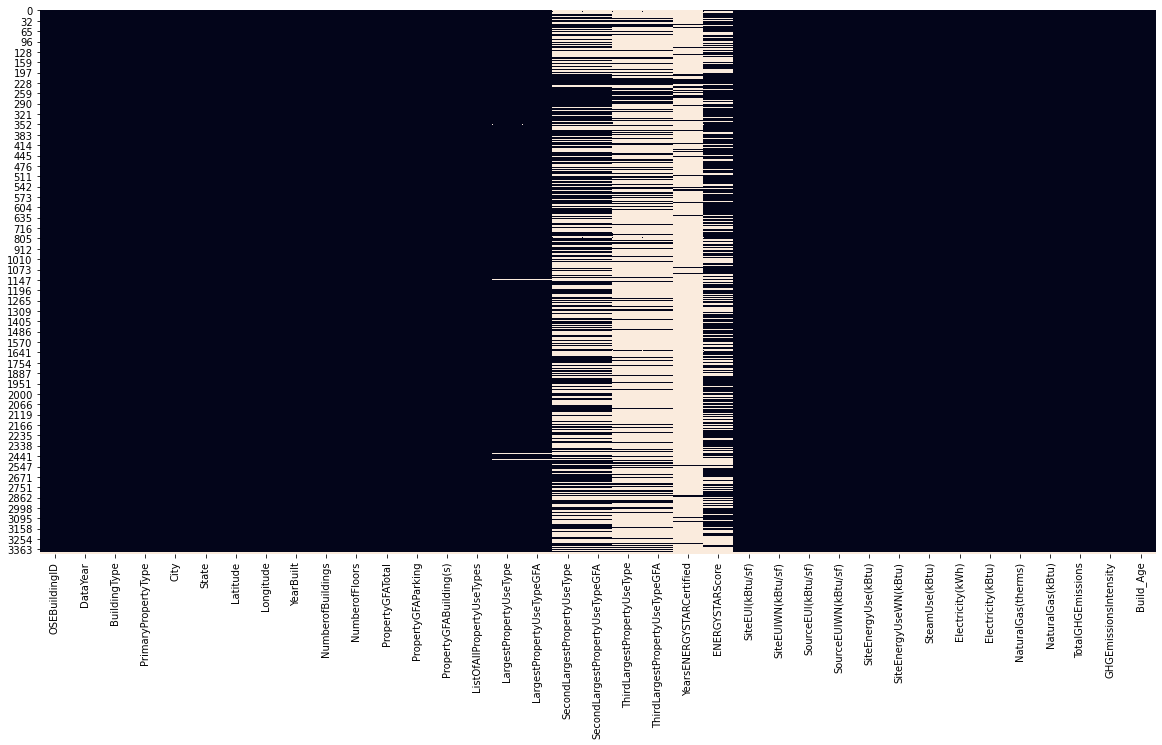

In [77]:
#sisualisation des Nan avec seaborn et le heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [78]:
Energy = ['SiteEUI(kBtu/sf)',
          'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
          'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
          'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
          'NaturalGas(kBtu)']

## Surface avec GFA

Foncière agricole, GFA (Groupement Foncier Agricole)

## Geopandas

In [79]:
# Create a geometry column by constructing Point objects from the lon and lat columns
df['geometry'] = df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

In [80]:
# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

In [81]:
gdf.crs

In [82]:
gdf = gdf[gdf.is_valid == True]

<AxesSubplot:>

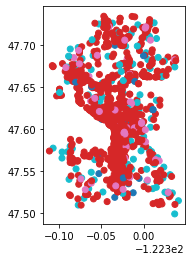

In [83]:
gdf['geometry'].centroid
gdf.plot(column = "BuildingType")

Nous pouvons également calculer la surface moyenne par bâtiment et par étage

check si dans les résidential il n'y a pas des property type à usage non résidential

Other dans property type, renseigner trouver l'info

faire une condition pour conserver les résidential avec mauvaise étiquette

# Analyse univariée

## Distribution des variables quantitatives

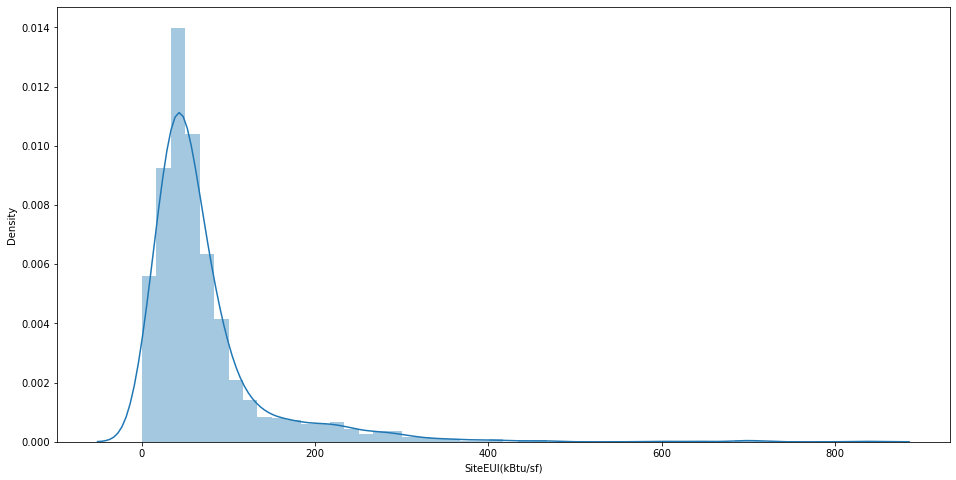

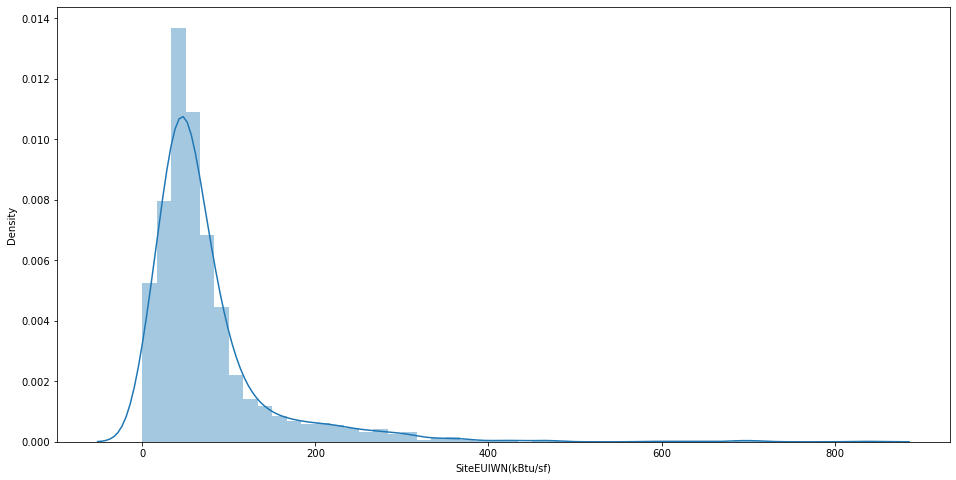

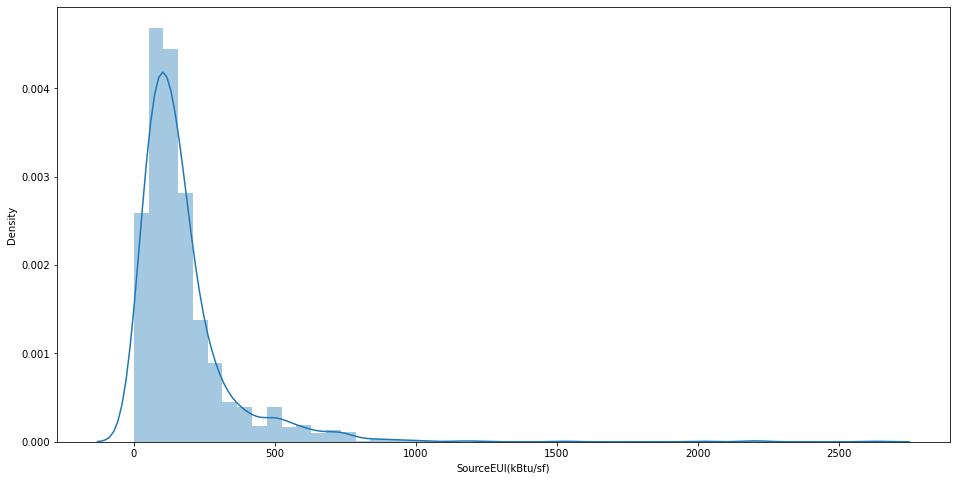

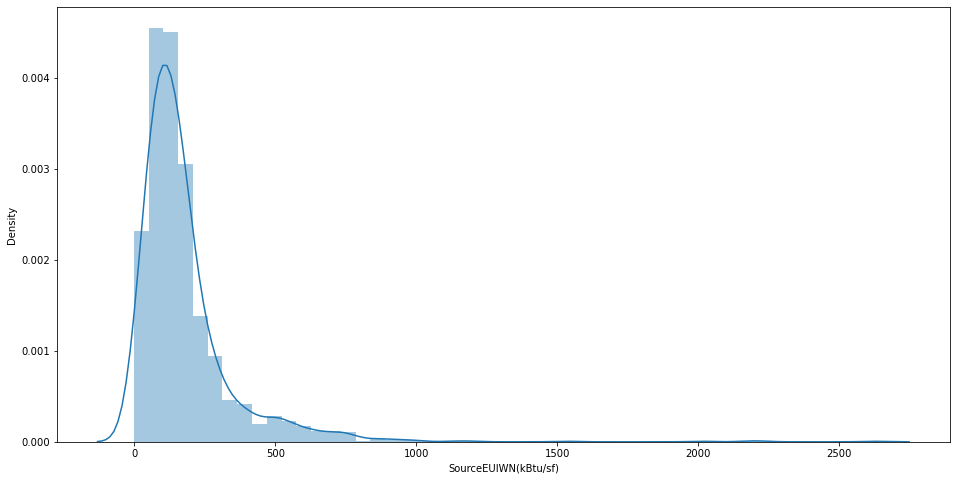

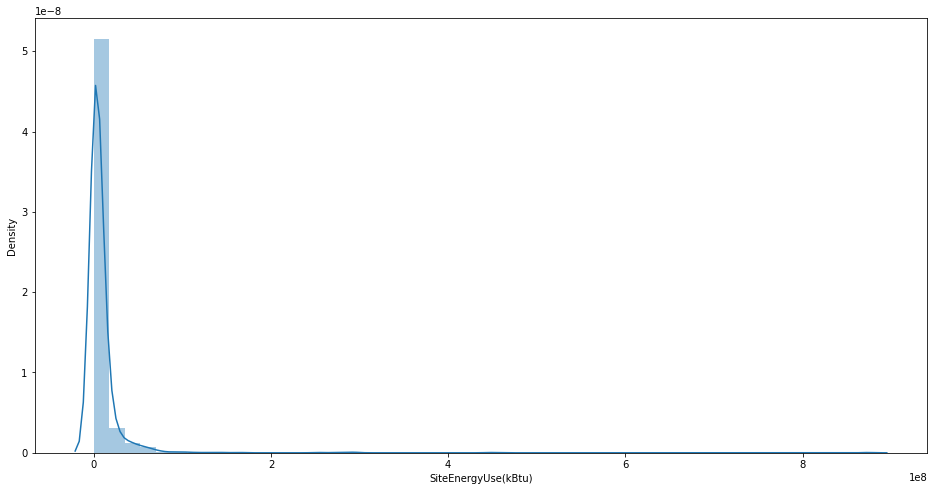

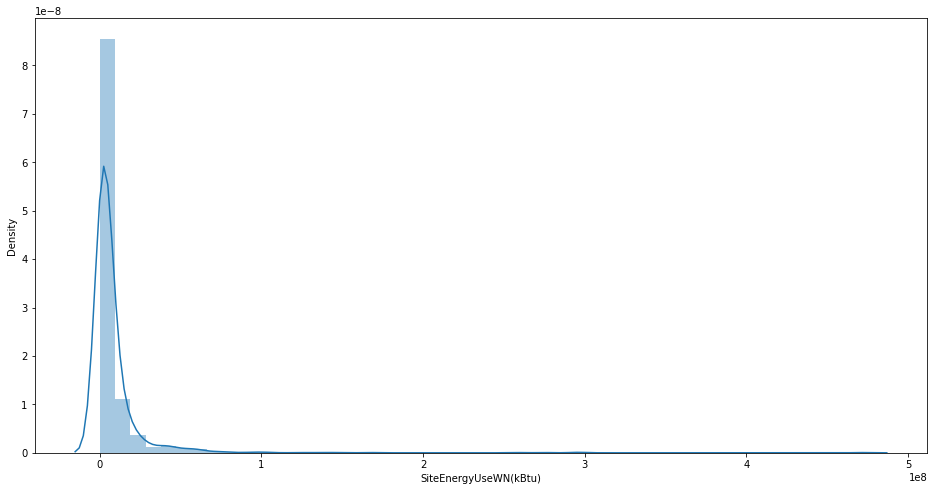

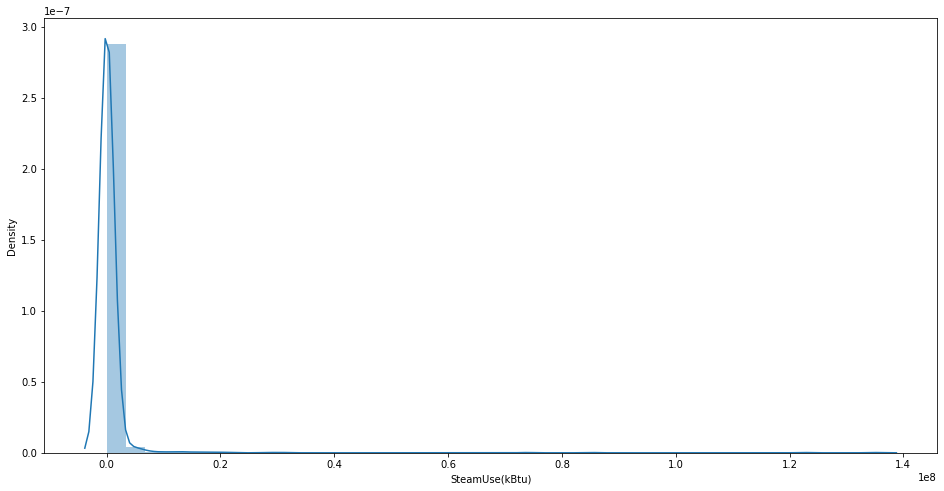

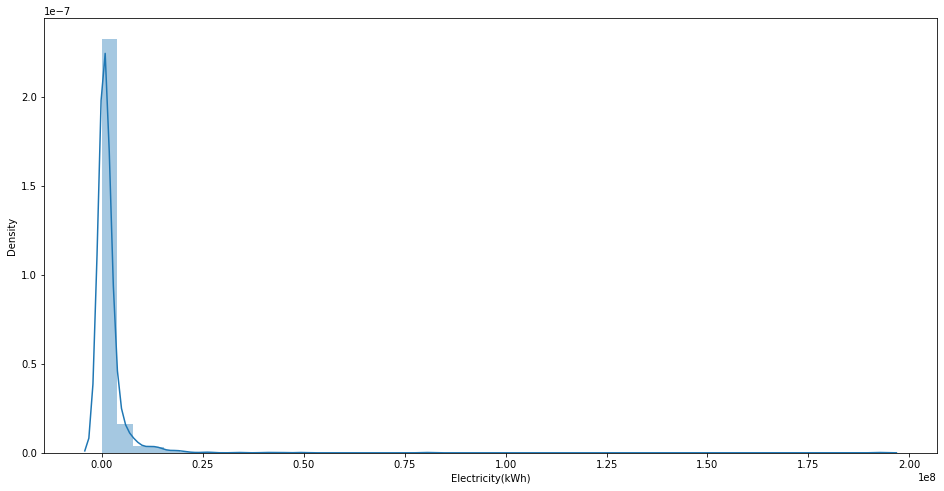

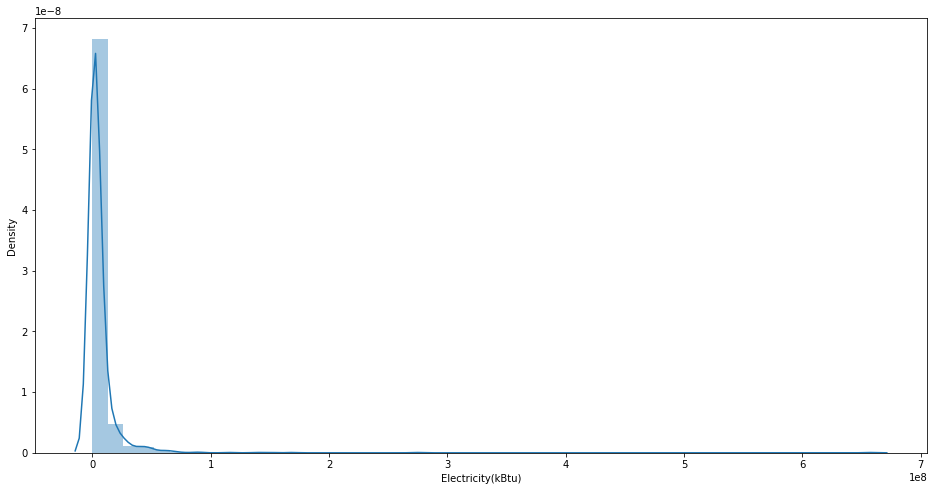

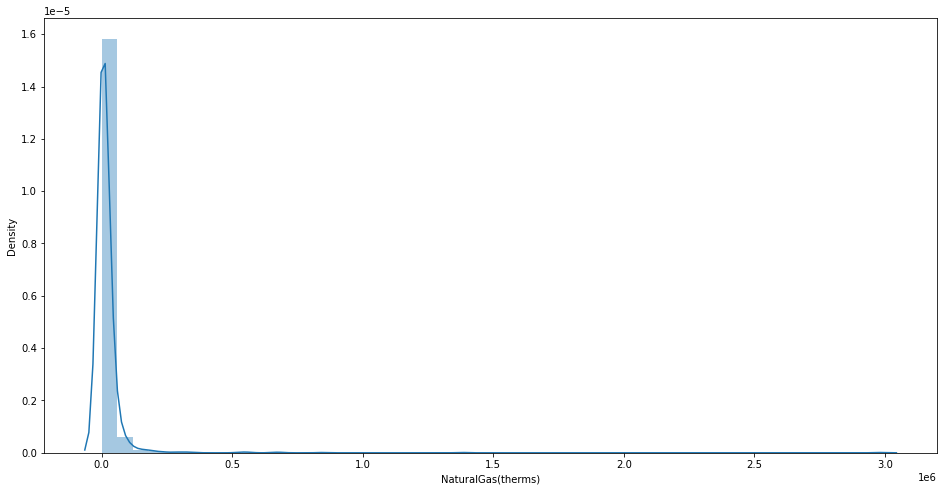

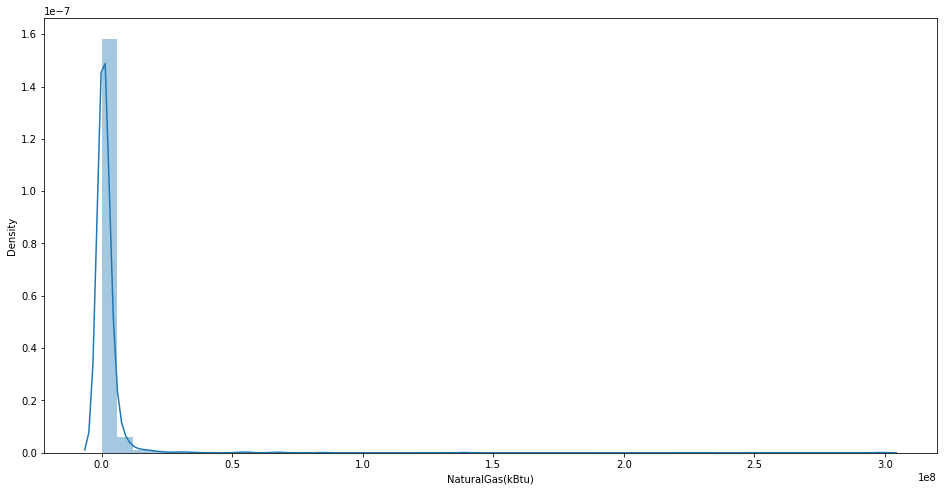

In [84]:
#distplot
for col in df[Energy]:
    plt.figure(figsize=(16, 8))
    sns.distplot(df[col], kde=True)
    plt.show()

OSEBuildingID


<Figure size 1152x576 with 0 Axes>

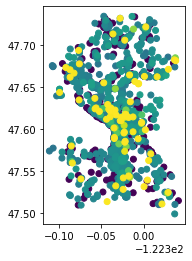

DataYear


<Figure size 1152x576 with 0 Axes>

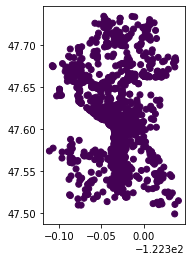

Latitude


<Figure size 1152x576 with 0 Axes>

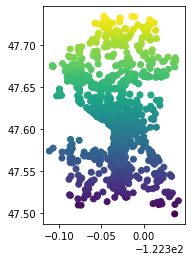

Longitude


<Figure size 1152x576 with 0 Axes>

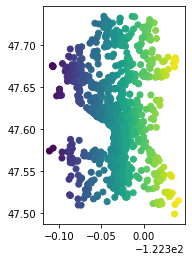

YearBuilt


<Figure size 1152x576 with 0 Axes>

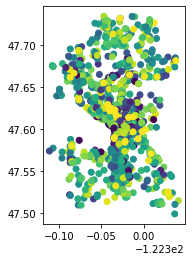

NumberofBuildings


<Figure size 1152x576 with 0 Axes>

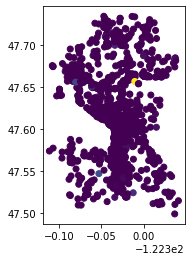

NumberofFloors


<Figure size 1152x576 with 0 Axes>

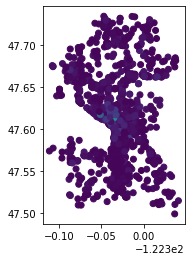

PropertyGFATotal


<Figure size 1152x576 with 0 Axes>

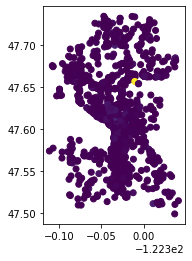

PropertyGFAParking


<Figure size 1152x576 with 0 Axes>

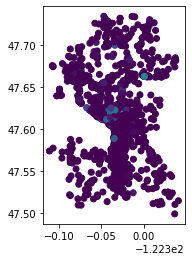

PropertyGFABuilding(s)


<Figure size 1152x576 with 0 Axes>

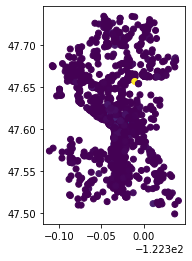

LargestPropertyUseTypeGFA


<Figure size 1152x576 with 0 Axes>

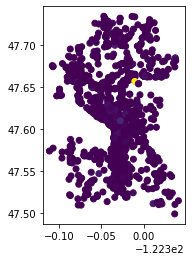

SecondLargestPropertyUseTypeGFA


<Figure size 1152x576 with 0 Axes>

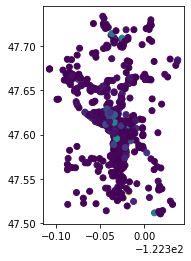

ThirdLargestPropertyUseTypeGFA


<Figure size 1152x576 with 0 Axes>

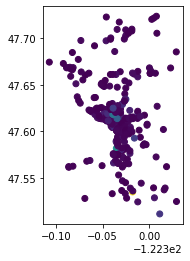

ENERGYSTARScore


<Figure size 1152x576 with 0 Axes>

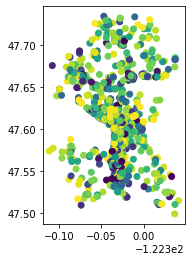

SiteEUI(kBtu/sf)


<Figure size 1152x576 with 0 Axes>

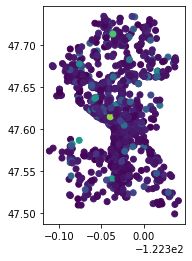

SiteEUIWN(kBtu/sf)


<Figure size 1152x576 with 0 Axes>

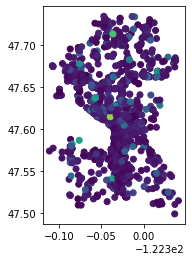

SourceEUI(kBtu/sf)


<Figure size 1152x576 with 0 Axes>

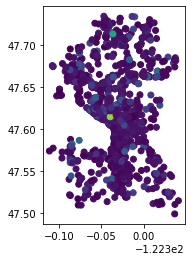

SourceEUIWN(kBtu/sf)


<Figure size 1152x576 with 0 Axes>

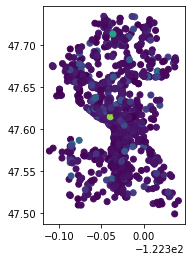

SiteEnergyUse(kBtu)


<Figure size 1152x576 with 0 Axes>

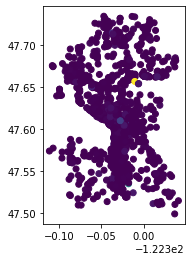

SiteEnergyUseWN(kBtu)


<Figure size 1152x576 with 0 Axes>

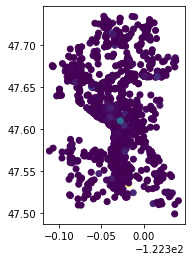

SteamUse(kBtu)


<Figure size 1152x576 with 0 Axes>

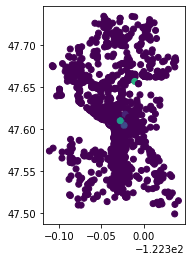

Electricity(kWh)


<Figure size 1152x576 with 0 Axes>

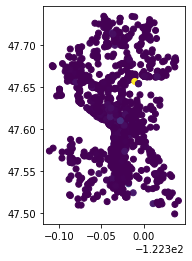

Electricity(kBtu)


<Figure size 1152x576 with 0 Axes>

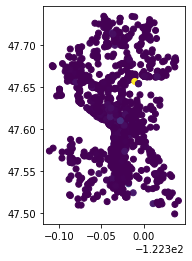

NaturalGas(therms)


<Figure size 1152x576 with 0 Axes>

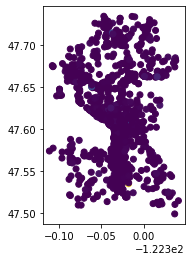

NaturalGas(kBtu)


<Figure size 1152x576 with 0 Axes>

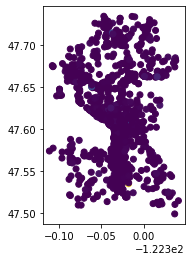

TotalGHGEmissions


<Figure size 1152x576 with 0 Axes>

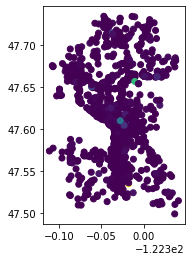

GHGEmissionsIntensity


<Figure size 1152x576 with 0 Axes>

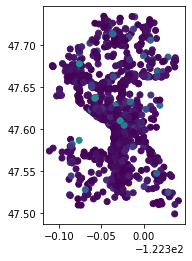

Build_Age


<Figure size 1152x576 with 0 Axes>

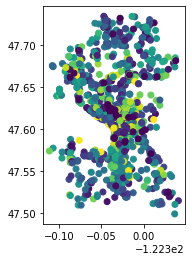

In [85]:
#distplot
for col in gdf.select_dtypes('float'):
    plt.figure(figsize=(16, 8))
    print(col)
    gdf.plot(column = col)
    plt.show()

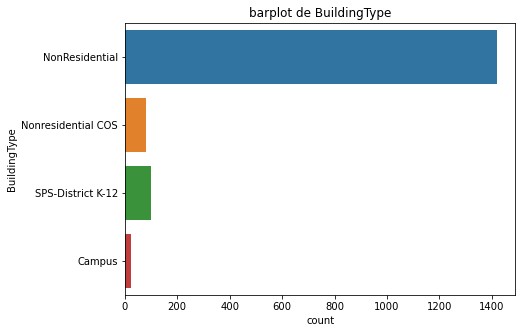

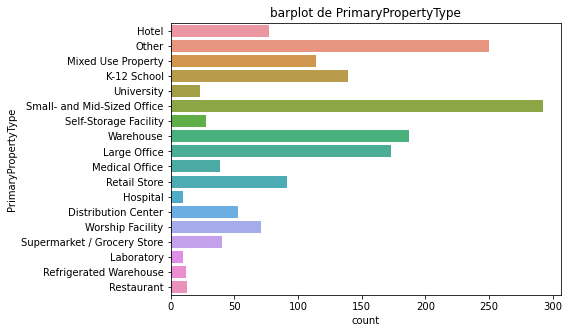

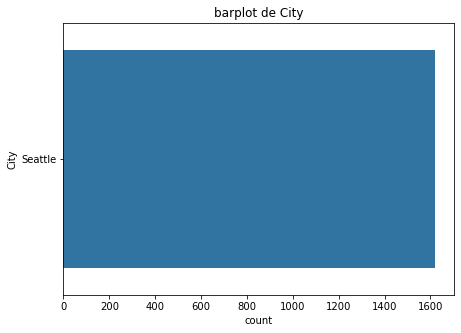

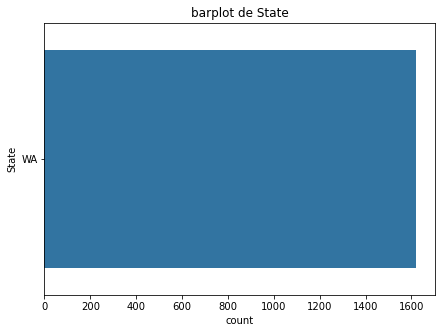

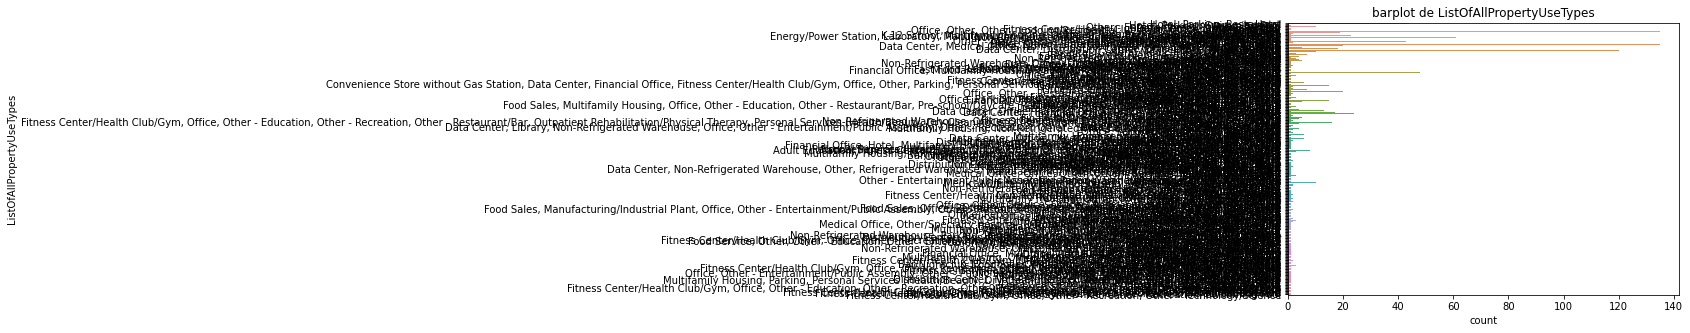

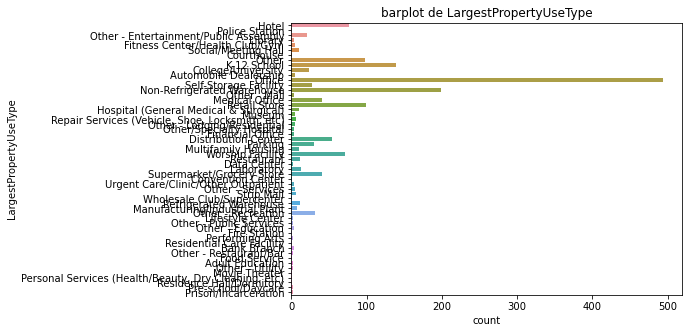

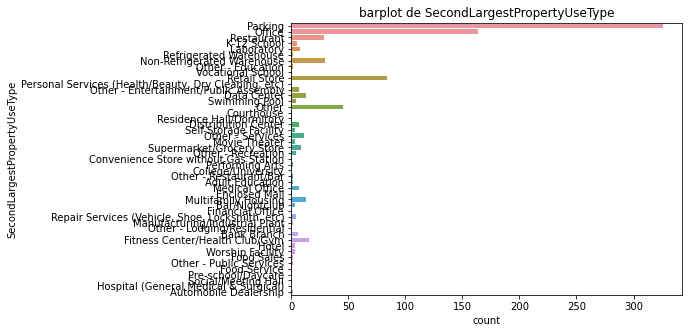

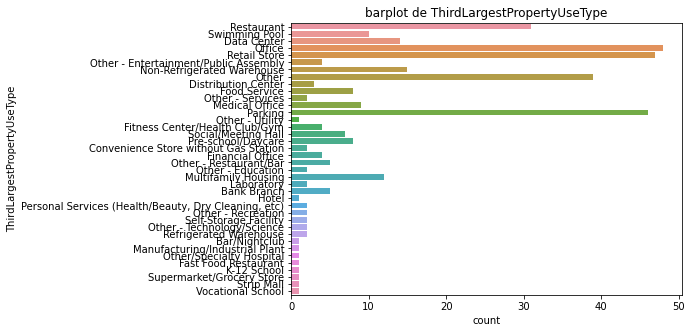

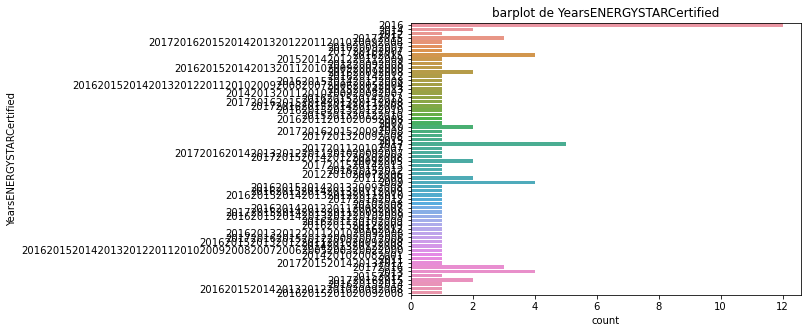

In [86]:
for col in df.select_dtypes('object'):
    plt.figure(figsize=(7,5))
    sns.countplot(y=df[col])
    plt.title('barplot de '+col)
    plt.show()

# Analyse Bivariée

## Matrice de Corrélation

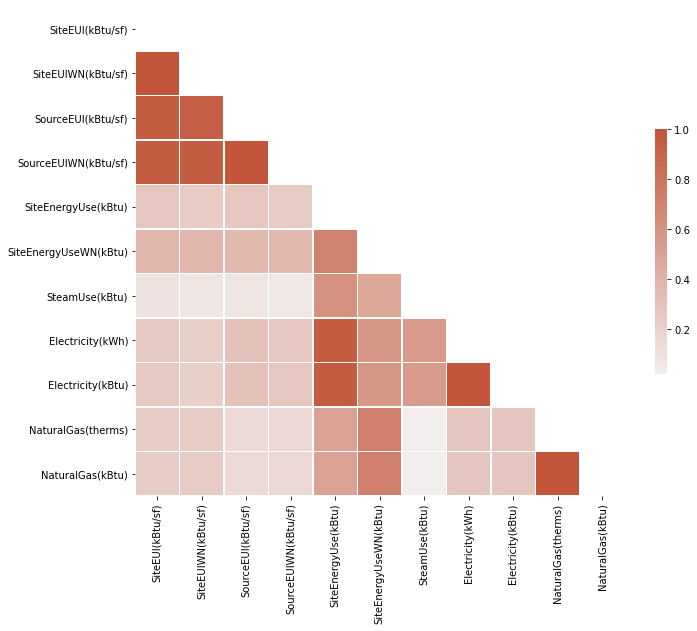

In [87]:
# Compute the correlation matrix
corr = df[Energy ].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Observation suite à la matrice de corrélation:

* 
* 
* 

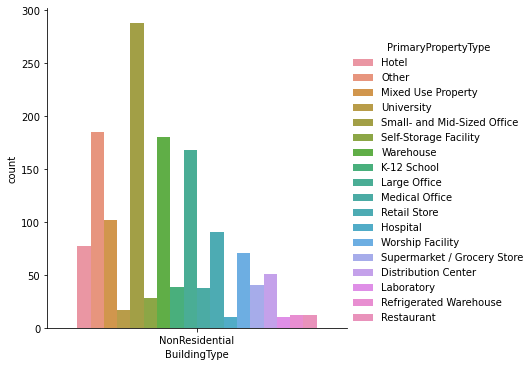

In [88]:
sns.catplot(x="BuildingType", hue="PrimaryPropertyType",
            data=df[df["BuildingType"] == "NonResidential"], kind='count', legend_out=True)

surprimer 1 row WA dans bulting type >> check documentation pour voir la signification

(array([0, 1, 2, 3]),
 [Text(0, 0, 'NonResidential'),
  Text(1, 0, 'Nonresidential COS'),
  Text(2, 0, 'SPS-District K-12'),
  Text(3, 0, 'Campus')])

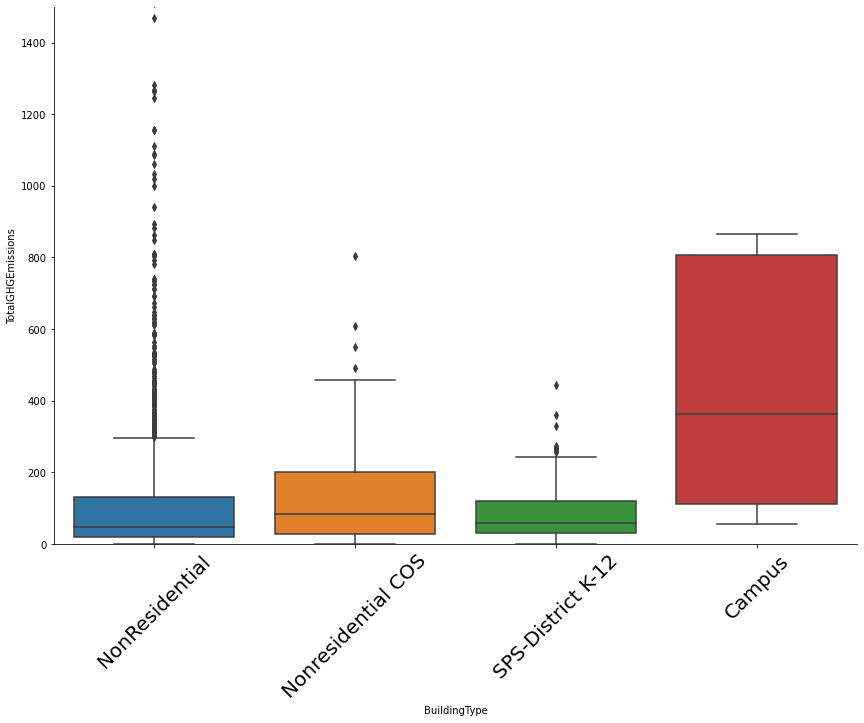

In [89]:
sns.catplot(x = 'BuildingType' , y = 'TotalGHGEmissions', data = df ,kind='box',height=8, aspect=1.5)
plt.ylim(0,1500)
plt.xticks(rotation = 45, fontsize = 20)

In [90]:
df.to_csv('Building_Energy_Benchmarking.csv', index=False, header=True)

In [91]:
df.shape

(1626, 38)